In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file_path_train = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\train_data.csv'
file_path_test = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\test_data.csv'

In [3]:
train_data = pd.read_csv(file_path_train, index_col = ['Date'])
test_data = pd.read_csv(file_path_test, index_col = ['Date'])

In [4]:
train_data.head()

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,,,,,,
2020-01-23,1,0,0,57.980000,57.020000,57.599998,57.770000,227900.0,54.500458,-0.386795
2020-01-24,2,0,0,57.799999,56.840000,57.730000,57.160000,146200.0,53.924980,-0.575478
2020-01-27,5,0,0,55.689999,54.820000,55.139999,55.279999,230600.0,52.151379,-1.773602
2020-01-28,5,0,0,56.090000,55.160000,55.490002,55.500000,174400.0,52.358929,0.207550
2020-01-29,5,0,0,55.900002,54.939999,55.799999,55.230000,214500.0,52.104210,-0.254719


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 2020-01-23 to 2020-06-18
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   confirmed             103 non-null    int64  
 1   death                 103 non-null    int64  
 2   recovered             103 non-null    int64  
 3   High                  103 non-null    float64
 4   Low                   103 non-null    float64
 5   Open                  103 non-null    float64
 6   Close                 103 non-null    float64
 7   Volume                103 non-null    float64
 8   adjusted_close        103 non-null    float64
 9   first_diff_adj_stock  103 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 8.9+ KB


In [45]:
y1 = train_data['confirmed']
y2 = train_data['death']
y3 = train_data['recovered']

In [46]:
x1 = train_data['Close']
x2 = train_data['adjusted_close']
x3 = train_data['Open']
x4 = train_data['High']

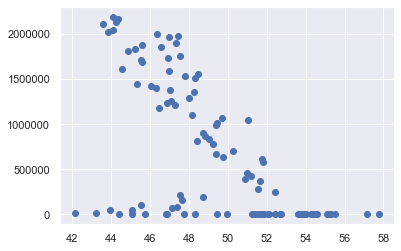

In [48]:
# confirmed and closing price
plt.scatter(x1, y1)

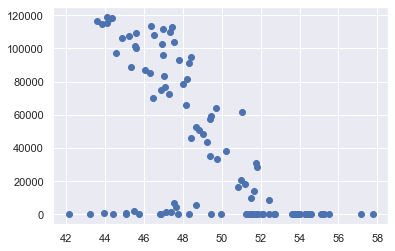

In [49]:
# death and closing price
plt.scatter(x1, y2)

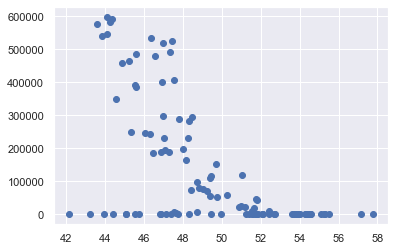

In [50]:
# Recover and closing price
plt.scatter(x1, y3)

In [52]:
#Log closing price
x11 = np.log(x1)

In [55]:
y11 = np.log(y1)

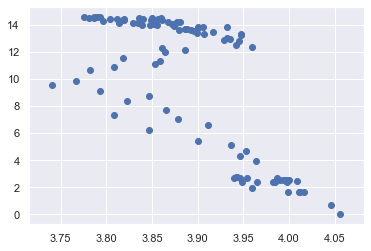

In [56]:
plt.scatter(x11, y11)

In [6]:
train_data.index

Index(['2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
       ...
       '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18'],
      dtype='object', name='Date', length=103)

In [7]:
train_data.index = pd.DatetimeIndex(train_data.index).to_period('B').dropna()

In [8]:
train_data.index

PeriodIndex(['2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
             '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03',
             '2020-02-04', '2020-02-05',
             ...
             '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
             '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16',
             '2020-06-17', '2020-06-18'],
            dtype='period[B]', name='Date', length=103, freq='B')

# AR Model 

### Optimal Lag Selection 

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
import statsmodels.api as sm

In [11]:
#ADF-test Original Data
res = sm.tsa.adfuller(train_data['adjusted_close'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.1098348523476309


In [12]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(train_data['adjusted_close'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.6171892860477165e-21


In [13]:
train_data

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,,,,,,
2020-01-23,1,0,0,57.980000,57.020000,57.599998,57.770000,227900.0,54.500458,-0.386795
2020-01-24,2,0,0,57.799999,56.840000,57.730000,57.160000,146200.0,53.924980,-0.575478
2020-01-27,5,0,0,55.689999,54.820000,55.139999,55.279999,230600.0,52.151379,-1.773602
2020-01-28,5,0,0,56.090000,55.160000,55.490002,55.500000,174400.0,52.358929,0.207550
2020-01-29,5,0,0,55.900002,54.939999,55.799999,55.230000,214500.0,52.104210,-0.254719
...,...,...,...,...,...,...,...,...,...,...
2020-06-12,2048986,115334,547386,44.590000,43.430000,44.580002,44.110001,244300.0,44.110001,0.260002
2020-06-15,2114026,116773,576334,44.090000,43.049999,43.349998,43.599998,154800.0,43.599998,-0.510002
2020-06-16,2137731,117612,583503,45.029999,44.009998,44.549999,44.230000,113200.0,44.230000,0.630001


<Figure size 864x576 with 0 Axes>

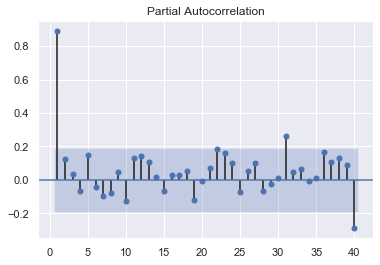

In [14]:
# PACF of differenced data

plt.figure(figsize = (12, 8))
plot_pacf(train_data.adjusted_close, lags = 40, zero = False, method = ('ols'))
plt.show()

# Fiting the AR Model

In [15]:
from statsmodels.tsa.arima_model import ARMA

### Check the Model Performance

In [16]:
from scipy.stats.distributions import chi2 

# define function to compare the likelihood ratio

def LLR_test(model1, model2, DF = 1):
    L1 = model1.llf
    L2 = model2.llf
    LR = 2 *(L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    
    return p 

In [17]:
# AR ORDER 1
ar1_model = ARMA(train_data.adjusted_close, order = (1, 0))
result_ar1 = ar1_model.fit()
print(result_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(1, 0)   Log Likelihood                -169.300
Method:                       css-mle   S.D. of innovations              1.239
Date:                Wed, 29 Jul 2020   AIC                            344.600
Time:                        09:26:13   BIC                            352.504
Sample:                    01-23-2020   HQIC                           347.801
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.3436      1.709     27.709      0.000      43.995      50.692
ar.L1.adjusted_close     0.9362      0.037     25.214      0.000       0.863       1.009
            

In [18]:
# AR ORDER 2
ar2_model = ARMA(train_data.adjusted_close, order = (2, 0))
result_ar2 = ar2_model.fit()
print(result_ar2.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar1, result_ar2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(2, 0)   Log Likelihood                -168.567
Method:                       css-mle   S.D. of innovations              1.230
Date:                Wed, 29 Jul 2020   AIC                            345.134
Time:                        09:26:13   BIC                            355.673
Sample:                    01-23-2020   HQIC                           349.402
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.4943      1.995     23.808      0.000      43.584      51.404
ar.L1.adjusted_close     0.8265      0.097      8.494      0.000       0.636       1.017
ar.L2.adjust

In [19]:
# AR ORDER 3
ar3_model = ARMA(train_data.adjusted_close, order = (3, 0))
result_ar3 = ar3_model.fit()
print(result_ar3.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar2, result_ar3)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(3, 0)   Log Likelihood                -168.529
Method:                       css-mle   S.D. of innovations              1.229
Date:                Wed, 29 Jul 2020   AIC                            347.059
Time:                        09:26:13   BIC                            360.232
Sample:                    01-23-2020   HQIC                           352.394
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.5238      2.059     23.078      0.000      43.488      51.560
ar.L1.adjusted_close     0.8229      0.098      8.383      0.000       0.631       1.015
ar.L2.adjust

In [20]:
# AR ORDER 5
ar5_model = ARMA(train_data.adjusted_close, order = (5, 0))
result_ar5 = ar5_model.fit()
print(result_ar5.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar3, result_ar5, DF = 2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(5, 0)   Log Likelihood                -167.189
Method:                       css-mle   S.D. of innovations              1.213
Date:                Wed, 29 Jul 2020   AIC                            348.379
Time:                        09:26:13   BIC                            366.822
Sample:                    01-23-2020   HQIC                           355.849
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.6011      2.223     21.410      0.000      43.244      51.959
ar.L1.adjusted_close     0.8357      0.097      8.609      0.000       0.645       1.026
ar.L2.adjust

In [21]:
# AR ORDER 10
ar10_model = ARMA(train_data.adjusted_close, order = (10, 0))
result_ar10 = ar10_model.fit()
print(result_ar10.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar5, result_ar10, DF = 5)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                    ARMA(10, 0)   Log Likelihood                -165.192
Method:                       css-mle   S.D. of innovations              1.188
Date:                Wed, 29 Jul 2020   AIC                            354.384
Time:                        09:26:15   BIC                            386.001
Sample:                    01-23-2020   HQIC                           367.190
                         - 06-18-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    47.2779      1.636     28.900      0.000      44.072      50.484
ar.L1.adjusted_close      0.8399      0.097      8.651      0.000       0.650       1.030
ar.L2.ad

In [22]:
# AR ORDER 15
ar15_model = ARMA(train_data.adjusted_close, order = (15, 0))
result_ar15 = ar15_model.fit()
print(result_ar15.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ar10, result_ar15, DF = 5)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                    ARMA(15, 0)   Log Likelihood                -162.832
Method:                       css-mle   S.D. of innovations              1.157
Date:                Wed, 29 Jul 2020   AIC                            359.664
Time:                        09:26:26   BIC                            404.455
Sample:                    01-23-2020   HQIC                           377.806
                         - 06-18-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    47.5720      2.124     22.399      0.000      43.409      51.735
ar.L1.adjusted_close      0.8284      0.098      8.474      0.000       0.637       1.020
ar.L2.ad

# MA Model

In [23]:
train_data.head()

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,,,,,,
2020-01-23,1,0,0,57.980000,57.020000,57.599998,57.770000,227900.0,54.500458,-0.386795
2020-01-24,2,0,0,57.799999,56.840000,57.730000,57.160000,146200.0,53.924980,-0.575478
2020-01-27,5,0,0,55.689999,54.820000,55.139999,55.279999,230600.0,52.151379,-1.773602
2020-01-28,5,0,0,56.090000,55.160000,55.490002,55.500000,174400.0,52.358929,0.207550
2020-01-29,5,0,0,55.900002,54.939999,55.799999,55.230000,214500.0,52.104210,-0.254719


<Figure size 864x576 with 0 Axes>

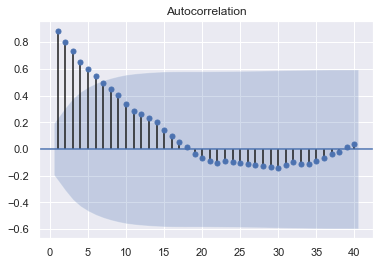

In [24]:
# ACF of differenced data

plt.figure(figsize = (12, 8))
plot_acf(train_data.adjusted_close, lags = 40, zero = False)
plt.show()

In [25]:
# MA ORDER 1
ma1_model = ARMA(train_data.adjusted_close, order = (0,1))
result_ma1 = ma1_model.fit()
print(result_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 1)   Log Likelihood                -218.362
Method:                       css-mle   S.D. of innovations              2.006
Date:                Wed, 29 Jul 2020   AIC                            442.725
Time:                        09:26:31   BIC                            450.629
Sample:                    01-23-2020   HQIC                           445.926
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8079      0.354    132.343      0.000      46.115      47.501
ma.L1.adjusted_close     0.7970      0.048     16.528      0.000       0.702       0.892
            

In [26]:
# MA ORDER 2
ma2_model = ARMA(train_data.adjusted_close, order = (0,2))
result_ma2 = ma2_model.fit()
print(result_ma2.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma1, result_ma2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 2)   Log Likelihood                -203.602
Method:                       css-mle   S.D. of innovations              1.738
Date:                Wed, 29 Jul 2020   AIC                            415.205
Time:                        09:26:31   BIC                            425.744
Sample:                    01-23-2020   HQIC                           419.474
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8213      0.409    114.414      0.000      46.019      47.623
ma.L1.adjusted_close     0.9490      0.096      9.838      0.000       0.760       1.138
ma.L2.adjust

In [27]:
# MA ORDER 3
ma3_model = ARMA(train_data.adjusted_close, order = (0,3))
result_ma3 = ma3_model.fit()
print(result_ma3.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma2, result_ma3)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 3)   Log Likelihood                -185.096
Method:                       css-mle   S.D. of innovations              1.446
Date:                Wed, 29 Jul 2020   AIC                            380.191
Time:                        09:26:32   BIC                            393.365
Sample:                    01-23-2020   HQIC                           385.527
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8582      0.478     98.015      0.000      45.921      47.795
ma.L1.adjusted_close     0.9852      0.083     11.807      0.000       0.822       1.149
ma.L2.adjust

In [28]:
# MA ORDER 4
ma4_model = ARMA(train_data.adjusted_close, order = (0,4))
result_ma4 = ma4_model.fit()
print(result_ma4.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma3, result_ma4)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 4)   Log Likelihood                -182.261
Method:                       css-mle   S.D. of innovations              1.408
Date:                Wed, 29 Jul 2020   AIC                            376.522
Time:                        09:26:32   BIC                            392.331
Sample:                    01-23-2020   HQIC                           382.925
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8705      0.534     87.750      0.000      45.824      47.917
ma.L1.adjusted_close     1.0399      0.095     10.925      0.000       0.853       1.226
ma.L2.adjust

In [29]:
# MA ORDER 5
ma5_model = ARMA(train_data.adjusted_close, order = (0,5))
result_ma5 = ma5_model.fit()
print(result_ma5.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma4, result_ma5)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 5)   Log Likelihood                -178.626
Method:                       css-mle   S.D. of innovations              1.359
Date:                Wed, 29 Jul 2020   AIC                            371.252
Time:                        09:26:32   BIC                            389.695
Sample:                    01-23-2020   HQIC                           378.722
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8967      0.579     81.050      0.000      45.763      48.031
ma.L1.adjusted_close     0.9289      0.102      9.112      0.000       0.729       1.129
ma.L2.adjust

In [30]:
# MA ORDER 6
ma6_model = ARMA(train_data.adjusted_close, order = (0,6))
result_ma6 = ma6_model.fit()
print(result_ma6.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma5, result_ma6)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 6)   Log Likelihood                -175.289
Method:                       css-mle   S.D. of innovations              1.315
Date:                Wed, 29 Jul 2020   AIC                            366.578
Time:                        09:26:32   BIC                            387.656
Sample:                    01-23-2020   HQIC                           375.116
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9150      0.638     73.537      0.000      45.665      48.165
ma.L1.adjusted_close     0.9540      0.098      9.708      0.000       0.761       1.147
ma.L2.adjust

In [31]:
# MA ORDER 7
ma7_model = ARMA(train_data.adjusted_close, order = (0,7))
result_ma7 = ma7_model.fit()
print(result_ma7.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma6, result_ma7)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 7)   Log Likelihood                -173.431
Method:                       css-mle   S.D. of innovations              1.291
Date:                Wed, 29 Jul 2020   AIC                            364.862
Time:                        09:26:33   BIC                            388.575
Sample:                    01-23-2020   HQIC                           374.467
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9349      0.672     69.894      0.000      45.619      48.251
ma.L1.adjusted_close     0.9556      0.101      9.507      0.000       0.759       1.153
ma.L2.adjust

In [32]:
# MA ORDER 8
ma8_model = ARMA(train_data.adjusted_close, order = (0,8))
result_ma8 = ma8_model.fit()
print(result_ma8.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma7, result_ma8)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 8)   Log Likelihood                -172.758
Method:                       css-mle   S.D. of innovations              1.283
Date:                Wed, 29 Jul 2020   AIC                            365.515
Time:                        09:26:33   BIC                            391.862
Sample:                    01-23-2020   HQIC                           376.187
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9588      0.689     68.185      0.000      45.609      48.309
ma.L1.adjusted_close     0.9109      0.117      7.796      0.000       0.682       1.140
ma.L2.adjust

In [33]:
# MA ORDER 9
ma9_model = ARMA(train_data.adjusted_close, order = (0,9))
result_ma9 = ma9_model.fit()
print(result_ma9.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma8, result_ma9)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 9)   Log Likelihood                -166.541
Method:                       css-mle   S.D. of innovations              1.161
Date:                Wed, 29 Jul 2020   AIC                            355.082
Time:                        09:26:44   BIC                            384.064
Sample:                    01-23-2020   HQIC                           366.821
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.0484      0.754     62.381      0.000      45.570      48.527
ma.L1.adjusted_close     0.6316      0.102      6.204      0.000       0.432       0.831
ma.L2.adjust

# ARMA Model

### Determine the order

In [34]:
# Automatic Order Selection
order_selection = sm.tsa.arma_order_select_ic(train_data['adjusted_close'].values, max_ar = 4, 
max_ma = 7, ic = "aic")

print('ARMA(p,q) =',order_selection['aic_min_order'],'is the best order for this model.')

ARMA(p,q) = (1, 0) is the best order for this model.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


In [35]:
# Note: since ARMA order is (1, 0), no ARMA model will be run

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
# ARIMA (1, 1, 1)
train_data.head()

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,,,,,,
2020-01-23,1,0,0,57.980000,57.020000,57.599998,57.770000,227900.0,54.500458,-0.386795
2020-01-24,2,0,0,57.799999,56.840000,57.730000,57.160000,146200.0,53.924980,-0.575478
2020-01-27,5,0,0,55.689999,54.820000,55.139999,55.279999,230600.0,52.151379,-1.773602
2020-01-28,5,0,0,56.090000,55.160000,55.490002,55.500000,174400.0,52.358929,0.207550
2020-01-29,5,0,0,55.900002,54.939999,55.799999,55.230000,214500.0,52.104210,-0.254719


In [38]:
# MA ORDER 8
ma8_model = ARMA(train_data.adjusted_close, order = (0,8))
result_ma8 = ma8_model.fit()
print(result_ma8.summary())

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  103
Model:                     ARMA(0, 8)   Log Likelihood                -172.758
Method:                       css-mle   S.D. of innovations              1.283
Date:                Wed, 29 Jul 2020   AIC                            365.515
Time:                        09:27:05   BIC                            391.862
Sample:                    01-23-2020   HQIC                           376.187
                         - 06-18-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9588      0.689     68.185      0.000      45.609      48.309
ma.L1.adjusted_close     0.9109      0.117      7.796      0.000       0.682       1.140
ma.L2.adjust

# ARIMA Model

In [39]:
# install the package
#!pip install pmdarima
# from pmdarima.arima import auto_arima

In [40]:
import pmdarima as pm

In [59]:
# Fit your model
model = pm.auto_arima(train_data.adjusted_close, exogenous = train_data.confirmed)

ValueError: Expected 2D array, got 1D array instead:
array=[      1       2       5       5       5       5       7      11      11
      11      11      11      11      12      12      13      13      13
      13      13      15      15      15      15      16      16      53
      73     104     174     222     519     711    1109    1561    2157
    4360    6141    8917   14157   19479   43850   54112   66055   84091
  102276  162707  188724  214205  244610  276547  367215  397992  429686
  464442  581813  608878  637974  669272  701996  783716  809318  837422
  871617  907908  990983 1015518 1043038 1072667 1106829 1184086 1208271
 1233527 1261409 1288587 1352962 1375152 1396110 1423727 1449027 1514901
 1535350 1559157 1584512 1608653 1689163 1707445 1730260 1754764 1816479
 1837374 1857332 1878683 1903907 1961785 1979912 2000706 2023656 2048986
 2114026 2137731 2163290 2191099].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  103
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -167.890
Date:                Wed, 29 Jul 2020   AIC                            337.779
Time:                        13:21:50   BIC                            340.404
Sample:                             0   HQIC                           338.842
                                - 103                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.5747      0.176      8.940      0.000       1.229       1.920
===================================================================================
Ljung-Box (Q):                       34.00   Jarque-Bera (JB):                10.59
Prob(Q):                              0.74   Prob(JB):                         0.01
Heteroskedasticity (H):               0.86   Skew:                             0.45
Prob(H) (two-sided):                  0.67   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""